In [1]:
# Import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

In [4]:
from matplotlib import rcParams
import warnings

In [5]:
warnings.filterwarnings("ignore")

In [6]:
# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [7]:
# Load dataset
data = pd.read_csv("pima_indians_diabetes.csv")

In [8]:
# Show sample of the dataset
data.head(5)

,id,preg,plas,pres,skin,insu,mass,pedi,age,class
0,1,6,148,72,35,0,33.6,0.627,50,tested_positive
1,2,1,85,66,29,0,26.6,0.351,31,tested_negative
2,3,8,183,64,0,0,23.3,0.672,32,tested_positive
3,4,1,89,66,23,94,28.1,0.167,21,tested_negative
4,5,0,137,40,35,168,43.1,2.288,33,tested_positive


In [9]:
data.columns

Index(['id', 'preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age',
       'class'],
      dtype='object')

In [10]:
# Split data into input and taget variable(s)
X = data.drop("class", axis=1)
y = data["class"]

In [11]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [13]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [15]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [16]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
2,plas,0.272698
6,mass,0.142133
7,pedi,0.120578
8,age,0.116021
0,id,0.090216
1,preg,0.072328
3,pres,0.070957
5,insu,0.059116
4,skin,0.055953


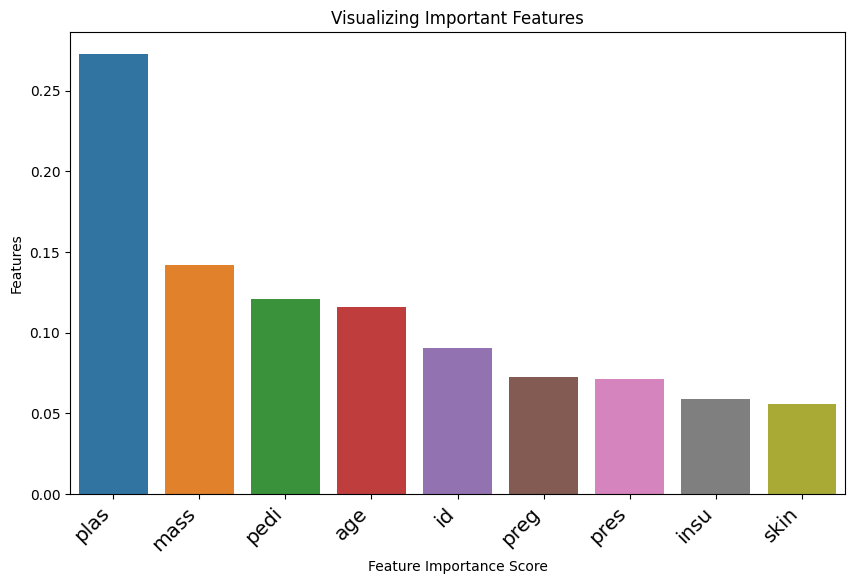

In [17]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [18]:
# load data with selected features
X = data.drop(["class", "skin"], axis=1)
y = data["class"]

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [19]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8311688311688312
